In [26]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
import tensorflow as tf
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

In [27]:
from dotenv import load_dotenv
from pathlib import Path  # Python 3.6+ only
import pandas as pd
import numpy as np
import os

# Path to the environment variables file .env
env_path = '/data/dssg-disinfo/.env'
load_dotenv(env_path, override=True)
PATH = os.getenv("PATH")
CLEAN_DATA = os.getenv("CLEAN_DATA")
df = pd.read_csv(os.path.join(PATH, CLEAN_DATA))

In [4]:
### Create sequence
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['article_text'])
sequences = tokenizer.texts_to_sequences(df['article_text'])
data = pad_sequences(sequences, maxlen=50)

In [6]:
## Network architecture
model = Sequential()
model.add(Embedding(20000, 300, input_length=50))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit the model
model.fit(data, np.array(df['label']), validation_split=0.4, epochs=3)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 17047 samples, validate on 11366 samples
Epoch 1/3
17047/17047 [==============================] - 70s 4ms/step - loss: 0.3532 - acc: 0.8391 - val_loss: 0.4027 - val_acc: 0.8247
Epoch 2/3
17047/17047 [==============================] - 68s 4ms/step - loss: 0.1865 - acc: 0.9273 - val_loss: 0.3832 - val_acc: 0.8538
Epoch 3/3
17047/17047 [==============================] - 67s 4ms/step - loss: 0.1011 - acc: 0.9626 - val_loss: 0.4480 - val_acc: 0.8438


## Word Embedding visualization

In [23]:
word_embds = model.layers[0].get_weights()[0]
word_list = []
for word, i in tokenizer.word_index.items():
    word_list.append(word)

In [ ]:
len(model.layers[0].get_weights())

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(word_embds)
number_of_words = 5
trace = go.Scatter(
    x = X_embedded[0:number_of_words,0], 
    y = X_embedded[0:number_of_words, 1],
    mode = 'markers',
    text= word_list[0:number_of_words]
)
layout = dict(title= 't-SNE 1 vs t-SNE 2 for first 5 words ',
              yaxis = dict(title='t-SNE 2'),
              xaxis = dict(title='t-SNE 1'),
              hovermode= 'closest')
fig = dict(data = [trace], layout= layout)
py.iplot(fig)

## Coursera

In [52]:
from sklearn.model_selection import train_test_split
X = df['article_text']
y = df.label
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(X, y, random_state = 42)

#training_sentences = df['article_text'][0:500]
#training_labels = df['label'][0:500]
training_labels_final = np.array(training_labels)

#testing_sentences = df['article_text'][501:750]
#testing_labels = df['label'][501:750]
testing_labels_final = np.array(testing_labels)

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [44]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))

skip to content watch live menu how to resolve covid corporate insurance row xml version embd html encoding utf 8 created with <OOV> wednesday 1 july 2020 12 22 uk xml version embd html encoding utf 8 svg public <OOV> <OOV> svg embd html embd html xml version embd html encoding utf 8 svg public <OOV> <OOV> svg embd html embd html xml version embd html encoding utf 8 <OOV> no xml version embd html encoding utf 8 <OOV> no image svg xml why you can trust sky news facebook twitter youtube instagram about sky news about us sky data sky news international sky news library sales site map editorial guidelines supreme court live sky news board sky news services


In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [48]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 21309 samples, validate on 7104 samples
Epoch 1/10
21309/21309 [==============================] - 3s 134us/sample - loss: 0.2896 - acc: 0.8657 - val_loss: 0.3576 - val_acc: 0.8511
Epoch 2/10
21309/21309 [==============================] - 3s 122us/sample - loss: 0.0751 - acc: 0.9749 - val_loss: 0.4120 - val_acc: 0.8580
Epoch 3/10
21309/21309 [==============================] - 3s 121us/sample - loss: 0.0172 - acc: 0.9969 - val_loss: 0.4935 - val_acc: 0.8484
Epoch 4/10
21309/21309 [==============================] - 3s 125us/sample - loss: 0.0049 - acc: 0.9993 - val_loss: 0.5455 - val_acc: 0.8539
Epoch 5/10
21309/21309 [==============================] - 3s 123us/sample - loss: 0.0019 - acc: 0.9997 - val_loss: 0.5957 - val_acc: 0.8553
Epoch 6/10
21309/21309 [==============================] - 3s 125us/sample - loss: 9.9223e-04 - acc: 1.0000 - val_loss: 0.6228 - val_acc: 0.8539
Epoch 7/10
21309/21309 [==============================] - 3s 124us/sample - loss: 5.4861e-04 - acc: 1.0000 

In [49]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [50]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## LSTM

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 209,793
Trainable params: 209,793
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
num_epochs = 2
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 21309 samples, validate on 7104 samples
Epoch 1/2
21309/21309 [==============================] - 125s 6ms/sample - loss: 0.0179 - acc: 0.9945 - val_loss: 0.7850 - val_acc: 0.8284
Epoch 2/2
21309/21309 [==============================] - 129s 6ms/sample - loss: 0.0109 - acc: 0.9970 - val_loss: 1.0507 - val_acc: 0.8387


In [66]:
history.history['acc']

[0.99450934, 0.9969966]

In [63]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

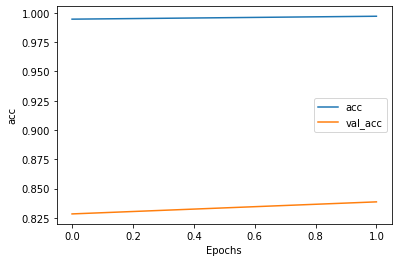

In [67]:
plot_graphs(history, 'acc')

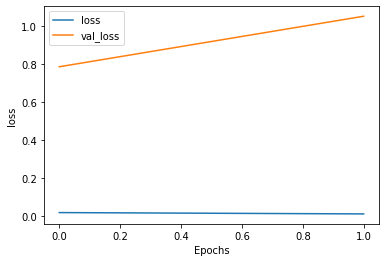

In [68]:
plot_graphs(history, 'loss')